In [1]:
import os
import random

def load_data_from_directory(data_dir, num_files=30):
    """
    从每个类别文件夹中加载前`num_files`篇文章。
    """
    category_files = {}
    
    # 遍历每个类别文件夹
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        
        if os.path.isdir(category_path):  
            # 获取该类别文件夹下的所有txt文件
            files = [f for f in os.listdir(category_path) if f.endswith('.txt')]
            
            # 随机选择前num_files篇文章
            selected_files = files[:num_files]  # 选择前30篇文件
            
            category_files[category] = []
            for file in selected_files:
                file_path = os.path.join(category_path, file)
                with open(file_path, 'r', encoding='gbk',errors='ignore') as f:
                    content = f.read()
                category_files[category].append(content)
    
    return category_files

# 使用函数加载数据
train_data_dir = "D:\\nlp文档\\fudan\\train\\train"  
train_data = load_data_from_directory(train_data_dir, num_files=30)

# 打印每个类别的前30篇文章
for category, texts in train_data.items():
    print(f"类别: {category}, 文章数: {len(texts)}")


类别: C11-Space, 文章数: 30
类别: C15-Energy, 文章数: 30
类别: C16-Electronics, 文章数: 27
类别: C17-Communication, 文章数: 25
类别: C19-Computer, 文章数: 30
类别: C23-Mine, 文章数: 30
类别: C29-Transport, 文章数: 30
类别: C3-Art, 文章数: 30
类别: C31-Enviornment, 文章数: 30
类别: C32-Agriculture, 文章数: 30
类别: C34-Economy, 文章数: 30
类别: C35-Law, 文章数: 30
类别: C36-Medical, 文章数: 30
类别: C37-Military, 文章数: 30
类别: C38-Politics, 文章数: 30
类别: C39-Sports, 文章数: 30
类别: C4-Literature, 文章数: 30
类别: C5-Education, 文章数: 30
类别: C6-Philosophy, 文章数: 30
类别: C7-History, 文章数: 30


由于原始数据集过大，硬件资源不支持全部训练，所以随机选取每个类别的前30篇文本作为训练集

In [2]:
import jieba

def tokenize_text(text):
    return list(jieba.cut(text))

# 验证，分词某篇文章
text = train_data["C3-Art"][0]  # 选择C3类别的第一篇文章
tokens = tokenize_text(text)
print(tokens)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YUXIYU~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.510 seconds.
Prefix dict has been built successfully.


['【', ' ', '文献号', ' ', '】', '1', '-', '2340', '\n', '【', '原文', '出处', '】', '中国', '图书', '评论', '\n', '【', '原刊', '地名', '】', '沈阳', '\n', '【', '原刊', '期号', '】', '199510', '\n', '【', '原刊', '页', '号', '】', '61', '-', '62', '\n', '【', '分', ' ', '类', ' ', '号', '】', 'Z1', '\n', '【', '分', ' ', '类', ' ', '名', '】', '出版', '工作', '、', '图书', '评介', '\n', '【', ' ', '作', ' ', ' ', '者', ' ', '】', '杨', '小民', '\n', '【', '复印', '期号', '】', '199602', '\n', '【', ' ', '标', ' ', ' ', '题', ' ', '】', '图书', '评论', '应当', '重视', '对', '书籍装帧', '艺术', '的', '评价', '\n', '【', ' ', '正', ' ', ' ', '文', ' ', '】', '\n', ' ', ' ', ' ', ' ', '图书', '评论', '是', '近代', '报刊', '业', '兴起', '后', '，', '在', '世界', '各国', '得到', '长足发展', '的', '一种', '新型', '评论', '体裁', '。', '而', '不论是', '书评', '理论', '还是', '书评', '实践', '都', '有', '一个', '不小', '的', '疏漏', '，', '即', '忽', '\n', '视', '了', '图书', '的', '形式', '因素', '。', '因为', '图书', '是', '内容', '与', '形式', '的', '综合体', '，', '忽视', '了', '“', '图书', '形式', '”', '这一', '重要', '方面', '，', '会', '导致', '在', '图书', '评论', '活动', '中', '忽视', '对

对每篇文章进行分词

In [3]:
import os
import random
import jieba

def tokenize_text(text):
    """
    使用jieba进行中文分词，返回分词后的词语列表
    """
    return list(jieba.cut(text))

def load_data_from_directory(data_dir, num_files=30):
    """
    从每个类别文件夹中加载前 `num_files` 篇文章，并进行分词
    """
    category_files = {}
    
    # 遍历每个类别文件夹
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        
        if os.path.isdir(category_path):  
            # 获取该类别文件夹下的所有txt文件
            files = [f for f in os.listdir(category_path) if f.endswith('.txt')]
            
            # 选择前num_files篇文章
            selected_files = files[:num_files]  # 选择前30篇文件
            
            category_files[category] = []
            for file in selected_files:
                file_path = os.path.join(category_path, file)
                
                # 读取文件内容，使用GBK编码并忽略解码错误
                try:
                    with open(file_path, 'r', encoding='gbk', errors='ignore') as f:
                        content = f.read()
                except Exception as e:
                    print(f"读取文件 {file_path} 时出错: {e}")
                    continue  # 如果出错，跳过该文件
                
                # 对每篇文章进行分词
                tokenized_content = tokenize_text(content)
                
                # 将分词后的内容存储到字典中
                category_files[category].append(tokenized_content)
    
    return category_files

# 使用函数加载数据并对每篇文章进行分词
train_data_dir = "D:\\nlp文档\\fudan\\train\\train"  
train_data = load_data_from_directory(train_data_dir, num_files=30)

# 打印每个类别的前30篇文章的分词结果数量
for category, tokenized_texts in train_data.items():
    print(f"类别: {category}, 分词后的文章数: {len(tokenized_texts)}")
    # 打印第一篇文章的分词结果
    print(f"类别 {category} 第一篇文章分词结果: {tokenized_texts[0][:10]}...")  # 只打印前10个词语

类别: C11-Space, 分词后的文章数: 30
类别 C11-Space 第一篇文章分词结果: ['宇航学', '报', '\n', 'JOURNAL', ' ', 'OF', ' ', 'ASTRONAUTICS', ' ', '\n']...
类别: C15-Energy, 分词后的文章数: 30
类别 C15-Energy 第一篇文章分词结果: ['【', ' ', '日', ' ', ' ', '期', ' ', '】', '19961230', '\n']...
类别: C16-Electronics, 分词后的文章数: 27
类别 C16-Electronics 第一篇文章分词结果: ['【', ' ', '日', ' ', ' ', '期', ' ', '】', '19960827', '\n']...
类别: C17-Communication, 分词后的文章数: 25
类别 C17-Communication 第一篇文章分词结果: ['【', ' ', '日', ' ', ' ', '期', ' ', '】', '19961225', '\n']...
类别: C19-Computer, 分词后的文章数: 30
类别 C19-Computer 第一篇文章分词结果: ['计算机', '应用', '\n', 'COMPUTER', ' ', 'APPLICATIONS', '\n', '1999', '年', ' ']...
类别: C23-Mine, 分词后的文章数: 30
类别 C23-Mine 第一篇文章分词结果: ['【', ' ', '日', ' ', ' ', '期', ' ', '】', '19960404', '\n']...
类别: C29-Transport, 分词后的文章数: 30
类别 C29-Transport 第一篇文章分词结果: ['【', ' ', '日', ' ', ' ', '期', ' ', '】', '19960104', '\n']...
类别: C3-Art, 分词后的文章数: 30
类别 C3-Art 第一篇文章分词结果: ['【', ' ', '文献号', ' ', '】', '1', '-', '2340', '\n', '【']...
类别: C31-Enviornment, 分词后的文章数: 

使用bert进行文本分类

In [4]:
from transformers import BertTokenizer
import torch
from torch.utils.data import DataLoader, TensorDataset

# 加载BERT分词器
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

def encode_texts(texts, max_length=512):
    """
    将分词后的文本转换为BERT可接受的输入格式
    """
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
    return inputs

# 准备训练数据
texts = []
labels = []

# 定义分类标签是类别文件夹的名字
category_to_id = {category: idx for idx, category in enumerate(train_data.keys())}

for category, tokenized_texts in train_data.items():
    label = category_to_id[category]
    for tokens in tokenized_texts:
        texts.append(" ".join(tokens))  # 将分词后的文本拼接成一个字符串
        labels.append(label)

# 将文本转换为BERT模型所需的格式
inputs = encode_texts(texts)

# 转换标签为Tensor
labels = torch.tensor(labels)

# 创建训练数据集
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)

# 创建DataLoader
train_dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

D:\anaconda3\envs\pytorch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
from transformers import BertForSequenceClassification, AdamW

# 加载BERT模型，设置分类的类别数
model = BertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=len(category_to_id))

# 设置优化器
optimizer = AdamW(model.parameters(), lr=5e-5)

# 将模型迁移到GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
D:\anaconda3\envs\pytorch\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

训练并保存模型

In [6]:
from tqdm import tqdm

# 训练模型
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch + 1}/{epochs}"):
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        
        optimizer.zero_grad()
        
        # 前向传播
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        
        # 反向传播和优化
        loss.backward()
        optimizer.step()
    
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1} - Loss: {avg_loss}")
# 保存模型
model.save_pretrained("./saved_model")  # 保存模型的权重和配置文件
# 保存分词器
tokenizer.save_pretrained("./saved_model")  # 保存分词器
print("模型和分词器已保存到 ./saved_model")


Training Epoch 1/5:   0%|          | 0/74 [00:00<?, ?it/s]D:\anaconda3\envs\pytorch\Lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
Training Epoch 1/5: 100%|██████████| 74/74 [00:35<00:00,  2.06it/s]


Epoch 1 - Loss: 2.3277930762316728


Training Epoch 2/5: 100%|██████████| 74/74 [00:35<00:00,  2.07it/s]


Epoch 2 - Loss: 0.6978710764968717


Training Epoch 3/5: 100%|██████████| 74/74 [00:35<00:00,  2.07it/s]


Epoch 3 - Loss: 0.26757405537205775


Training Epoch 4/5: 100%|██████████| 74/74 [00:35<00:00,  2.08it/s]


Epoch 4 - Loss: 0.1902973036206252


Training Epoch 5/5: 100%|██████████| 74/74 [00:35<00:00,  2.06it/s]


Epoch 5 - Loss: 0.04472199339117553
模型和分词器已保存到 ./saved_model


In [7]:
from transformers import BertTokenizer, BertForSequenceClassification

# 加载保存的分词器
tokenizer = BertTokenizer.from_pretrained("./saved_model")
# 加载保存的模型
model = BertForSequenceClassification.from_pretrained("./saved_model")

# 切换到评估模式
model.eval()
print("模型和分词器已成功加载")


模型和分词器已成功加载


In [8]:
# 使用之前的代码加载测试集并进行分词
def load_test_data_from_directory(data_dir, num_files=10):
    """
    从每个类别文件夹中加载前 `num_files` 篇文章，并进行分词
    """
    category_files = {}

    # 遍历每个类别文件夹
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        
        if os.path.isdir(category_path):  
            # 获取该类别文件夹下的所有txt文件
            files = [f for f in os.listdir(category_path) if f.endswith('.txt')]
            
            # 选择前num_files篇文章
            selected_files = files[:num_files]  # 选择前10篇文件
            
            category_files[category] = []
            for file in selected_files:
                file_path = os.path.join(category_path, file)
                
                # 读取文件内容，使用GBK编码并忽略解码错误
                try:
                    with open(file_path, 'r', encoding='gbk', errors='ignore') as f:
                        content = f.read()
                except Exception as e:
                    print(f"读取文件 {file_path} 时出错: {e}")
                    continue  # 如果出错，跳过该文件
                
                # 对每篇文章进行分词
                tokenized_content = tokenize_text(content)
                
                # 将分词后的内容存储到字典中
                category_files[category].append(tokenized_content)
    
    return category_files

# 使用函数加载数据
test_data_dir = "D:\\nlp文档\\fudan\\test\\test"  # 替换为你的测试集路径
test_data = load_test_data_from_directory(test_data_dir, num_files=10)

# 打印每个类别的前10篇文章的分词结果数量
for category, tokenized_texts in test_data.items():
    print(f"类别: {category}, 分词后的文章数: {len(tokenized_texts)}")

类别: C11-Space, 分词后的文章数: 10
类别: C15-Energy, 分词后的文章数: 10
类别: C16-Electronics, 分词后的文章数: 10
类别: C17-Communication, 分词后的文章数: 10
类别: C19-Computer, 分词后的文章数: 10
类别: C23-Mine, 分词后的文章数: 10
类别: C29-Transport, 分词后的文章数: 10
类别: C3-Art, 分词后的文章数: 10
类别: C31-Enviornment, 分词后的文章数: 10
类别: C32-Agriculture, 分词后的文章数: 10
类别: C34-Economy, 分词后的文章数: 10
类别: C35-Law, 分词后的文章数: 10
类别: C36-Medical, 分词后的文章数: 10
类别: C37-Military, 分词后的文章数: 10
类别: C38-Politics, 分词后的文章数: 10
类别: C39-Sports, 分词后的文章数: 10
类别: C4-Literature, 分词后的文章数: 10
类别: C5-Education, 分词后的文章数: 10
类别: C6-Philosophy, 分词后的文章数: 10
类别: C7-History, 分词后的文章数: 10


同样由于资源有限，选取测试集中每个类别的前10篇作测试集

In [9]:
# 准备测试数据
test_texts = []
test_labels = []

# 将每个类别的分词结果及其标签整合
for category, tokenized_texts in test_data.items():
    label = category_to_id[category]  # 获取该类别的标签
    for tokens in tokenized_texts:
        test_texts.append(" ".join(tokens))  # 将分词后的文本拼接成一个字符串
        test_labels.append(label)  # 将该标签添加到labels列表

# 将文本转换为BERT模型所需的格式
test_inputs = encode_texts(test_texts)

# 转换标签为Tensor
test_labels = torch.tensor(test_labels)

# 创建测试数据集
test_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

# 创建测试DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [10]:
from sklearn.metrics import accuracy_score

def evaluate(model, dataloader):
    """
    使用给定的模型和 DataLoader 进行测试，并返回准确率
    """
    model.eval()  # 切换到评估模式
    all_preds = []
    all_labels = []

    with torch.no_grad():  # 禁用梯度计算
        for batch in dataloader:
            # 将所有张量迁移到同一设备（GPU 或 CPU）
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            
            # 前向传播
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            
            # 获取预测值
            preds = torch.argmax(logits, dim=1)
            
            # 移动到 CPU 并收集结果
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # 计算准确率
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy




In [12]:
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [13]:
# 测试模型
test_accuracy = evaluate(model, test_dataloader)
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.94


In [16]:
def predict(text, model, tokenizer, max_length=512):
    """
    使用保存的模型对单条文本进行预测
    """
    model.eval()
    # 分词并编码
    inputs = tokenizer(text, truncation=True, padding=True, max_length=max_length, return_tensors="pt")
    inputs = {key: val.to(device) for key, val in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        pred = torch.argmax(logits, dim=1).cpu().numpy()[0]
    
    return pred




In [17]:
# 自定义文本
text = "领导干部要努力学习马克思主义哲学，学习唯物辩证法，讲究思想方法，注意防止和克服认识上与工作中的片面性。要改进工作作风，防止和克服形式主义，密切联系群众，努力为基层服务。"
predicted_label = predict(text, model, tokenizer)
print(f"预测标签: {predicted_label}")

预测标签: 18


In [20]:
for category, label in category_to_id.items():
    if label == 18:
        print(f"标签 18 对应的类别是: {category}")

标签 18 对应的类别是: C6-Philosophy


In [19]:
# 自定义文本
text = "Transformer 是一种用于处理序列数据的深度学习模型，其核心机制是自注意力机制（Self-Attention Mechanism），以及它如何通过层叠结构处理输入数据。"
predicted_label = predict(text, model, tokenizer)
print(f"预测标签: {predicted_label}")

预测标签: 4


In [21]:
for category, label in category_to_id.items():
    if label == 4:
        print(f"标签 4 对应的类别是: {category}")

标签 4 对应的类别是: C19-Computer


In [22]:
from transformers import BertTokenizer, BertForSequenceClassification

# 加载保存的模型和分词器
tokenizer = BertTokenizer.from_pretrained("./saved_model")
model = BertForSequenceClassification.from_pretrained("./saved_model", output_attentions=True)

# 切换到评估模式
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [23]:
def get_attention_weights(text, model, tokenizer):
    """
    对输入文本获取注意力权重
    """
    # 对输入文本进行编码
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # 前向传播，获取注意力权重
    with torch.no_grad():
        outputs = model(**inputs)
        attentions = outputs.attentions  # 注意力权重
    
    return attentions, inputs['input_ids']


获取注意力权重并可视化

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_attention(attentions, input_ids, tokenizer, layer=0, head=0):
    """
    可视化某一层某一头的注意力权重
    """
    # 选择特定层和头的注意力权重
    attention_weights = attentions[layer][0, head].detach().cpu().numpy()  # (seq_len, seq_len)

    # 将输入 ID 转换为对应的词
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0].tolist())

    # 绘制热力图
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, cmap="Blues", annot=False)
    plt.title(f"Attention Weights (Layer {layer+1}, Head {head+1})")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.show()


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.
D:\anaconda3\envs\pytorch\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 36825 (\N{CJK UNIFIED IDEOGRAPH-8FD9}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\anaconda3\envs\pytorch\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\anaconda3\envs\pytorch\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\anaconda3\envs\pytorch\Lib\

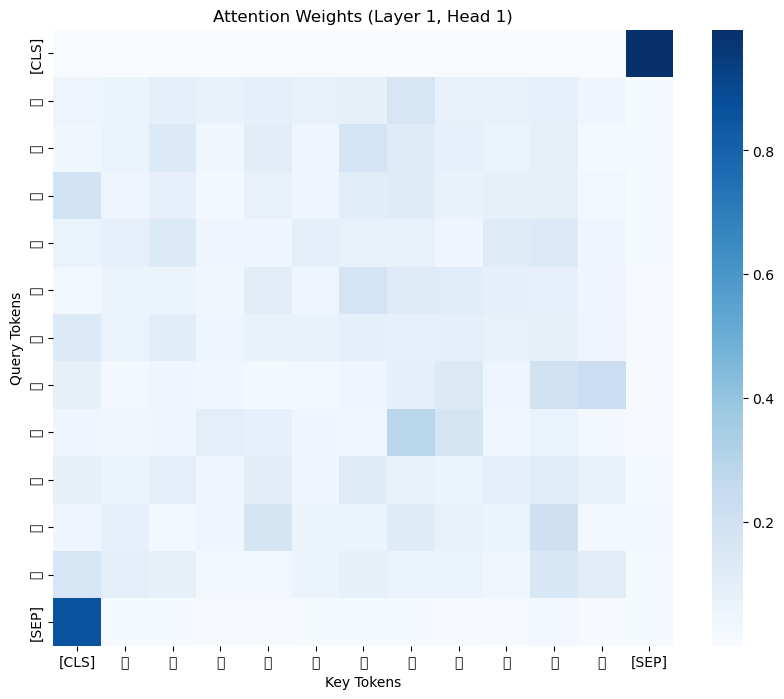

D:\anaconda3\envs\pytorch\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 36825 (\N{CJK UNIFIED IDEOGRAPH-8FD9}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\anaconda3\envs\pytorch\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\anaconda3\envs\pytorch\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\anaconda3\envs\pytorch\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\anaconda3\envs\pytorch\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\anaconda3\envs\pytorch\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20110 (\N{CJK UNIFIED IDEOGRAPH

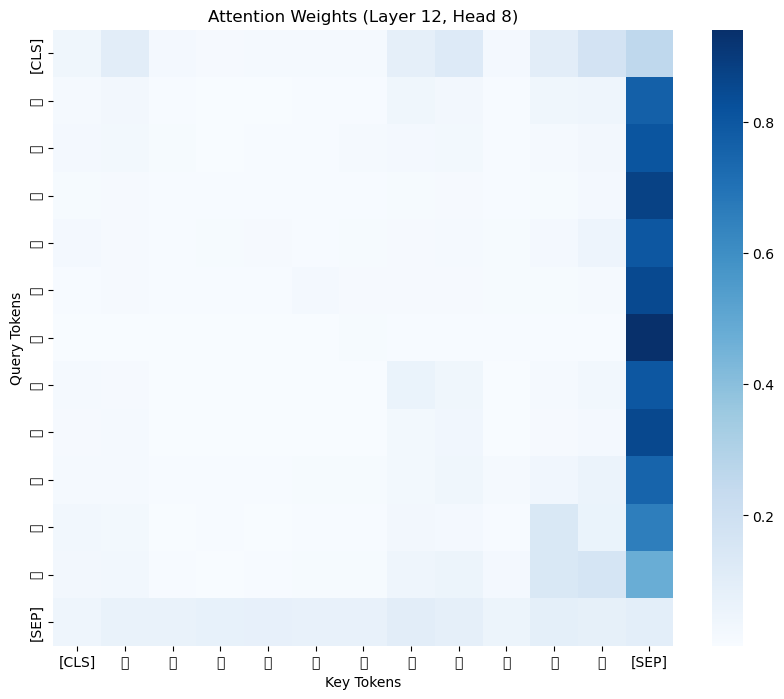

In [25]:
# 输入文本
text = "这是一个用于测试的句子"

# 获取注意力权重和输入 ID
attentions, input_ids = get_attention_weights(text, model, tokenizer)

# 可视化第 1 层第 1 头的注意力权重
visualize_attention(attentions, input_ids, tokenizer, layer=0, head=0)

# 可视化第 12 层第 8 头的注意力权重（BERT 一般有 12 层和 12 个头）
visualize_attention(attentions, input_ids, tokenizer, layer=11, head=7)
